# **Decision Tree Classifier**

### **Importing All Necessary Libraries**

In [15]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### **Data Framing**

In [16]:
df = pd.read_csv('heart_data.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


The above dataset describes the medical records for individuals and their risk factors for coronary heart disease (CHD) over the next ten years.

Fields description follow:

1. male = Gender of the individual (1 = male, 0 = female)
2. age = Age of the individual (years)
3. education = Level of education (1 = some high school, 2 = high school graduate, 3 = some college or vocational school, 4 = college graduate)
4. currentSmoker = Current smoking status (1 = smoker, 0 = non-smoker)
5. cigsPerDay = Average number of cigarettes smoked per day (if current smoker)
6. BPMeds = Blood pressure medications usage (1 = yes, 0 = no)
7. prevalentStroke = History of stroke (1 = yes, 0 = no)
8. prevalentHyp = Hypertension status (1 = yes, 0 = no)
9. diabetes = Diabetes status (1 = yes, 0 = no)
10. totChol = Total cholesterol level (mg/dL)
11. sysBP = Systolic blood pressure (mm Hg)
12. diaBP = Diastolic blood pressure (mm Hg)
13. BMI = Body Mass Index (weight in kg/(height in m)^2)
14. heartRate = Resting heart rate (beats per minute)
15. glucose = Fasting blood glucose level (mg/dL)
16. TenYearCHD = Risk of coronary heart disease in the next ten years (1 = yes, 0 = no)

In [17]:
print(f"data shape: {df.shape}\n") # Checking data shape
print(df.isnull().sum(), "\n") # Checking null values
print(df.describe())

data shape: (4238, 16)

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64 

              male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000  

### **Feature Extraction**

In [18]:
# Define features and target
features = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 
            'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 
            'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
target = 'TenYearCHD'

# Split data into features and target
X = df[features]
y = df[target]

### **Splitting the dataset**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Define Preprocessing Steps**

In [20]:
numeric_features = X.select_dtypes(include='number').columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

numeric_features: Columns with numeric data types.

numeric_transformer: 

    Pipeline for numeric columns:
    
        SimpleImputer: Fills missing values with the median of each column.

        StandardScaler: Scales features to have mean 0 and variance 1.

### **Build a Pipeline**

In [21]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(random_state=42))])


pipeline: Chains together the preprocessor (ColumnTransformer) and the DecisionTreeClassifier into a single object (Pipeline).

### **Define Parameter Grid for GridSearchCV**

In [22]:
param_grid = {
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

param_grid: Dictionary specifying the hyperparameters to search over during cross-validation (GridSearchCV). 

Includes parameters like max_depth, min_samples_split, min_samples_leaf, and criterion for the DecisionTreeClassifier.

### **Grid Search Cross-Validation**

In [23]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object'))])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

GridSearchCV: Performs grid search cross-validation (cv=5 folds) to find the best hyperparameters for the model (pipeline) using accuracy (scoring='accuracy').

### **Print Best Parameters and Best Score**

In [24]:
print("Best parameters found:")
print(grid_search.best_params_)
print("Best accuracy score found:", grid_search.best_score_)

Best parameters found:
{'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10}
Best accuracy score found: 0.8185840707964603


Prints the best hyperparameters (best_params_) found by GridSearchCV and the corresponding best accuracy score (best_score_) during the search.

### **Use the Best Model**

In [25]:
best_model = grid_search.best_estimator_

best_model: Retrieves the best model (best_estimator_) found by GridSearchCV for further evaluation.

### **Predict on the test data**

In [26]:
y_pred = best_model.predict(X_test)

y_pred: Predicts the target variable (TenYearCHD) for the test set (X_test) using best_model.

### **Generating Classification Report**

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       724
           1       0.27      0.10      0.15       124

    accuracy                           0.83       848
   macro avg       0.56      0.53      0.53       848
weighted avg       0.77      0.83      0.79       848



### **Plotting the confusion matrix**

Confusion Matrix:  
 [[688  36]
 [111  13]]


<Axes: >

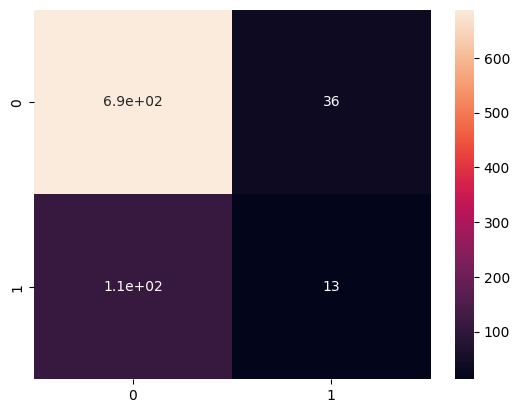

In [28]:
import seaborn as sns
# Confusion Matrix
print("Confusion Matrix: ", "\n", confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)